# Name:- Parshwa Shah
# Experiment No.:- 1a
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

<h2>Aim:- To implement and use Linear Regression using Python Platform </h2>

<center> <h1> Linear Regression </h1><center>

<h3> Importing the libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> Importing the dataset </h3>

In [2]:
dataset = pd.read_csv('auto-mpg.csv')

In [3]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<h3> Check for Nan values in dataset </h3>

In [4]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<h3> Data count exploration </h3>

In [5]:
dataset['car name'].value_counts()

ford pinto                      6
amc matador                     5
ford maverick                   5
toyota corolla                  5
amc hornet                      4
                               ..
volkswagen 1131 deluxe sedan    1
ford pinto runabout             1
ford thunderbird                1
datsun 210 mpg                  1
honda civic 1500 gl             1
Name: car name, Length: 305, dtype: int64

<AxesSubplot:ylabel='model year'>

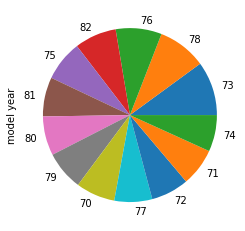

In [6]:
dataset['model year'].value_counts().plot(kind='pie')

<AxesSubplot:>

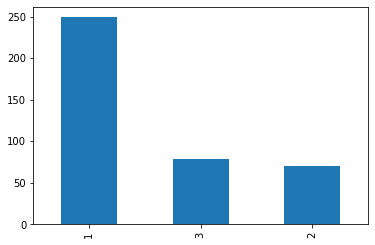

In [7]:
dataset['origin'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='cylinders'>

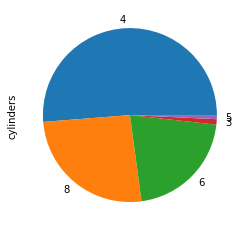

In [8]:
dataset['cylinders'].value_counts().plot(kind='pie')

<h3> Drop unnecessary columns </h3>

In [9]:
dataset = dataset.drop('car name', axis=1)

In [10]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


<h3> One Hot Encoding of Categorical columns</h3>

In [11]:
dataset = pd.get_dummies(dataset, columns=['origin'])

In [12]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


<h3> Check the types of dataset columns</h3>

In [13]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object

<h3> Impute unfilled values in horsepower column with median value </h3>

In [14]:
dataset['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
107     1
54      1
167     1
116     1
108     1
Name: horsepower, Length: 94, dtype: int64

In [15]:
 unfilled_value = pd.DataFrame(dataset.horsepower.str.isdigit())  

In [16]:
unfilled_value.value_counts()

horsepower
True          392
False           6
dtype: int64

In [17]:
dataset[unfilled_value['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [18]:
dataset = dataset.replace('?', np.nan)
dataset[unfilled_value['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [19]:
median_fill = lambda x: x.fillna(x.median())
dataset = dataset.apply(median_fill,axis=0)
dataset['horsepower'] = dataset['horsepower'].astype('float64')  
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


<h3> Bi-variate analysis of dataset</h3>

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

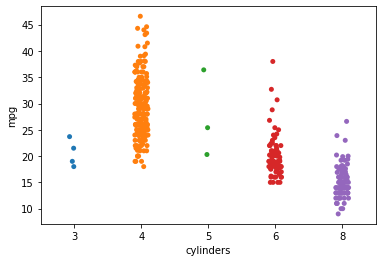

In [21]:
sns.stripplot(x='cylinders', y='mpg', data=dataset)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

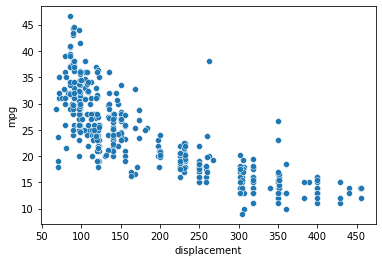

In [22]:
sns.scatterplot(x='displacement', y='mpg', data=dataset)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

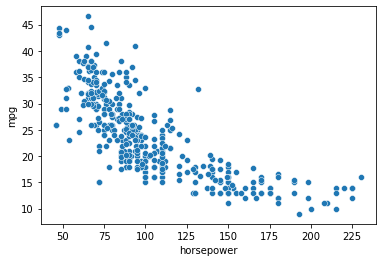

In [23]:
sns.scatterplot(x='horsepower', y='mpg', data=dataset)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

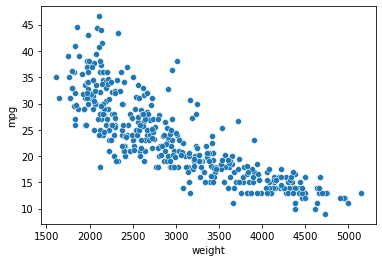

In [24]:
sns.scatterplot(x='weight', y='mpg', data=dataset)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

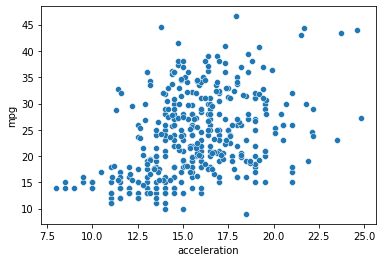

In [25]:
sns.scatterplot(x='acceleration', y='mpg', data=dataset)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

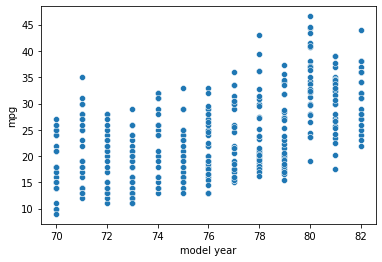

In [26]:
sns.scatterplot(x='model year', y='mpg', data=dataset)

<h3>Inference</h3> <br/>
1) 4 cylinders in car has higher mpg value. <br/>
2) Less the displacement, more is the mpg value. <br/>
3) Less the horsepower, more is the mpg value. <br/>
4) Less the weight, more is the mpg value. <br/>
5) More the acceleration, more is the mpg value. <br/>
6) Later the model year, more is the mpg value. <br/>

<h3> Divide dataset into X and y </h3>

In [27]:
X = dataset.iloc[:,1:]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


In [28]:
y = dataset.iloc[:,0]
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

<h3> Apply MinMaxScaler on data </h3>

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1.        , 0.61757106, 0.45652174, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.72868217, 0.64673913, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.64599483, 0.56521739, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.13436693, 0.17934783, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.13178295, 0.19565217, ..., 1.        , 0.        ,
        0.        ]])

<h3> Split the dataset into 80% training set and 20% test set</h3>

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

<h3> Apply the Linear Regression regressor </h3>

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

<h3> Print Mean Absolute Error and Mean Squared Error </h3>

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE=",mean_absolute_error(y_test, y_pred))
print("MSE=",mean_squared_error(y_test, y_pred))

MAE= 2.103548217356455
MSE= 7.618843053968872


<h3> Print R2 Score</h3>

In [33]:
from sklearn.metrics import r2_score
print("R2 Score=",r2_score(y_test, y_pred))

R2 Score= 0.8647729653026788


### Conclusion:-
### Hence, from this experiment, I understood the concept of regression. Also, I performed Exploratory Data Analysis on Auto Mpg Dataset and applied Linear Regression after it and achieved an MAE of 2.1 and R2 score of 0.86. This product can be used to find mpg(miles per gallon) given the car features.